In [10]:
import os
!pip install pandas_read_xml

#Just change the location to your directory
#the program looks for result.xml and makes a graph out of it

pathlist=[]
location = 'test_data'

for r, d, f in os.walk(location):
    for item in f:
        if 'results.xml' in item:
            pathlist.append(os.path.join(r, item))
            
            
print(pathlist)


['test_data\\PMC5764404\\results\\search\\country\\results.xml', 'test_data\\PMC5764404\\results\\search\\disease\\results.xml', 'test_data\\PMC5764404\\results\\search\\funders\\results.xml', 'test_data\\PMC5764404\\results\\word\\frequencies\\results.xml', 'test_data\\PMC5905443\\results\\search\\country\\results.xml', 'test_data\\PMC5905443\\results\\word\\frequencies\\results.xml', 'test_data\\PMC6002110\\results\\search\\country\\results.xml', 'test_data\\PMC6002110\\results\\search\\disease\\results.xml', 'test_data\\PMC6002110\\results\\search\\funders\\results.xml', 'test_data\\PMC6002110\\results\\search\\tropicalVirus\\results.xml', 'test_data\\PMC6002110\\results\\word\\frequencies\\results.xml']


In [11]:
#First do all the imports
import pandas_read_xml as pdx
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
#Initiate a dataframe that reads the xml things within the tags snippetsTree and snippets
import nltk
nltk.download('stopwords')
#replace ../input/sddsfsdff/result.xml
bad=[]
def makegraph(file_name):
    df = pdx.read_xml(file_name, ['results'])
    #Initiate two lists in which we are going to append the values
    row=[]
    colum=[]

    #Run a for loop to get the words and their frequency from df["result"][i] which is a dict. automatically made from the dataframe
    for i in range(0,len(df['result'])):
            try:
                row.append(df['result'][i]['@word'])
                colum.append(df['result'][i]['@count'])
            except:
                bad.append(file_name)

    #print(row)
    #print(colum)
    
    name_for_grap=os.path.dirname(file_name)
    name_for_graph=os.path.basename(name_for_grap)
    
    name=file_name.replace("/",'_')
    name_final=name.replace('.','_')
    #Make new dataframe with the names and frequency
    df = pd.DataFrame({"Name":row,
                      "Frequency":colum})
    

    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    df['Name without stop'] = df['Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df['Name without stop'].replace('', np.nan, inplace=True)
    df.dropna(subset=['Name without stop'], inplace=True)
    df['Name']=df['Name without stop']
    df=df.drop(['Name without stop'],axis=1)
    for i in range(len(df['Name'])):
        df['Name'][i]=str(df['Name'][i])
        if type(df['Name'][i]) != str:
            print(i)
    df2=df[~df.Name.str.contains("{")]


    for i in range(len(df['Frequency'])):
        df['Frequency'][i]=int(df['Frequency'][i])
        if type(df['Frequency'][i]) != int:
            print(i)
    
    
    top=df['Frequency'].astype(float).nlargest(3)
    df.to_csv('sbc.csv',index=False)
    #initiate matplotlib
    plt.figure(figsize=(3,6))

    #configure seaborn graph to make things look pretty and sort the data
    sns.barplot(x="Name",
                y="Frequency", 
                data=df, 
                order=df.sort_values('Frequency').Name.iloc[-10:])
   
    plt.xlabel("Terms")
    plt.xlim(0, None)

    #rotate the x axis labels because they dont fit in graph
    plt.xticks(rotation=90)
    # adding tight_layout to make sure everything is nice and organised and doesnt overflow
    plt.tight_layout()
    name=file_name.replace("/",'_')
    name_final=name.replace('.','_')
    plt.show().get_figure().savefig(f"abc{name_final}.png")
    # save the graph
    
    
    
    return("Made the graphs")





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\themo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


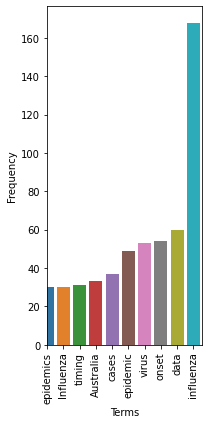

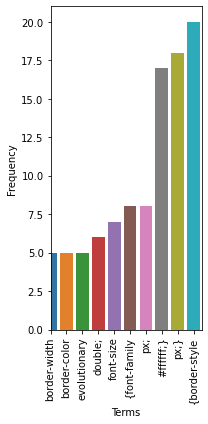

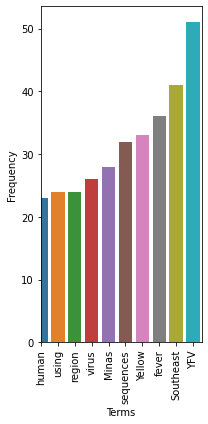

In [12]:

        

for i in pathlist:
    try:
        makegraph(i)
    except:
        print()
    